# Домашнее задание 6. Кластеризация.

### О задании

Часть 1 содержит практическое задание на реализацию метода KMeans.

Часть 2 содержит практическое задание на применение методов KMeans и DBSCAN.

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / 8,
$$

где points — количество баллов, которое вы набрали. Всего в данном домашнем задании можно набрать 8 баллов. Итого, максимальная оценка за данное домашнее задание - $8 \times 10 / 8 = 10$.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

# Часть 1. K-means своими руками (4 балла)

В этом задании вам нужно будет реализовать алгоритм K-Means. Для этого потребуется:

- следовать инструкциям
- воспользоваться базовыми техниками `numpy`
- понимание, что происходит в алгоритме K-Means

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)

Сгенерируем случайную выборку. Матрица объекты-признаки находится в переменной $X$.

In [ ]:
np.random.seed(13)
X1 = np.random.randn(100,2)
X2 = np.random.randn(100,2) - np.array([10,1])
X3 = np.random.randn(100,2) - np.array([1,10])
X = np.vstack((X1,X2,X3))

Визуализируем выборку:

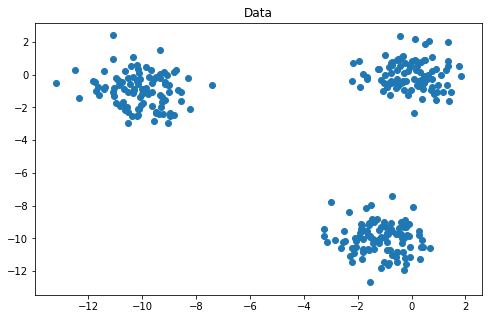

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.title('Data')
plt.show()

## Задание 1 (1 балл)

Чтобы реализовать алгоритм K-Means, нам понадобится вспомогательная функция. В процессе работы алгоритма мы все время обновляем значение целевой переменной для каждого объекта - то есть на каждом шаге вычисляем, к какому кластеру он относится. На каждом шаге нам известно, где находятся центры кластеров, так что задача - для каждого объекта посчитать расстояние до центров кластеров и выбрать ближайший из них в качестве ответа.

На практике это удобно сделать с помощью функции [`sklearn.metrics.pairwise_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html). Она может принимать на вход два массива $X$ и $Y$, а на выходе предоставить матрицу расстояний, где в $i$-ой строке и $j$-ом столбце стоит расстояние между $i$-ым объектом в $X$ и $j$-ым объектом в $Y$.

Не воспрещается и реализовать это как-то по-другому.

Также в процессе вам возможно понадобится функция `np.argmin` (не забудьте про параметр `axis`!).

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
def compute_clusters(X, centers):
    """
    INPUT:
    X - np.array, (n_objects x n_features) - матрица объекты-признаки
    centers - np.array, (n_clusters x n_features) - матрица, содержащая координаты центров кластеров
    
    OUTPUT:
    y - np.array, (n_objects,) - вектор, состоящий из меток кластеров (0, 1, ..., n_clusters-1), где
    на i-ом месте стоит метка кластера для i-ого объекта выборки X
    """
    # your code here
    y = np.argmin(pairwise_distances(X, centers), axis=1) # returns a matrix of distances for each element from X to centers
    return y

centers = (np.arange(6)*0.05).reshape(3, 2)
assert np.allclose(
    compute_clusters(X, centers), 
    np.array([0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
)

## Задание 2 (3 балла)

Реализуйте класс KMeans, обладающий методами `fit` (*находит оптимальные центры кластеров*) и `transform` (*вычисляет, к какому кластеру относятся каждый объект выборки*).

Метод `fit`:

1. Посчитайте, сколько объектов и признаков есть в выборке. **(0.33 балла)**
2. Инициализируйте $y$ - вектор длины `n_objects` (число объектов в выборке $X$), хранящий изначальные метки кластеров для объектов (можно воспользоваться функциями `np.empty`, `np.random.randint` или какими-то другими). **(0.33 балла)**
3. Создайте матрицу для хранения центров кластеров (размера `n_clusters x n_features`) - можно заполнить ее нулями. **(0.33 балла)**
4. На каждой итерации обновите центры кластеров. То есть для каждого кластера посчитайте центр тяжести по формуле ниже и переместите центр кластера туда:
$$
c_j = \frac{\sum\limits_{x \in C^j}x}{|C^j| + \varepsilon},
$$
где $c_j$ - центр тяжести, $C^j$ - кластер, $x$ - объект из кластера $C^j$ (вектор - в сумме мы просто складываем их координаты), $|C^j|$ - число объектов в кластере $C^j$, $\varepsilon$ - какое-то очень маленькое число (например, $10^{-6}$) для стабильности - чтобы мы не поделили на $0$, если в кластере $C^j$ нет объектов. Возможно, в этом задании вам понадобятся функции `sum`, `mean` - не забывайте про параметр `axis`! **(1 балл)**
5. После перемещения центров кластеров в центры тяжести обновите $y$ - чтобы отнести объекты к кластерам с пересчитанными центрами. Каждый объект будет относиться к тому кластеру, расстояние от центра которого до объекта наименьшее. (Вот тут вам понадобится функция `compute_clusters`). **(0.5 балл)**

Метод `transform`:

1. Для выборки $X$ посчитайте, к какому из найденных кластеров (с центрами в `self.centers`) относится каждый объект. Здесь вам тоже понадобится функция `compute_clusters`). **(0.5 балла)**.

In [ ]:
class KMeans:
    def __init__(self, n_clusters):
        # гиперпараметр - количество кластеров
        self.n_clusters = n_clusters
        
    def fit(self, X, max_iter=10, visualize=False):
        """
        INPUT:
        X - np.array, (n_objects x n_features) - матрица объекты-признаки
        max_iter - int - максимальное число итераций
        visualize - bool - визуализировать ли объекты и центры кластеров на каждой итерации 
        """
        # Цель: обучить центры кластеров self.centers, форма: число кластеров x число признаков
        
        # Шаг 1: сколько объектов и признаков?
        self.X = X
        num_obj = self.X.shape[0] # your code here
        num_feat = self.X.shape[1] # your code here
        
        # Шаг 2: инициализируйте y - вектор длины n_objects, 
        # хранящий, к какому кластеру относится каждый объект
        # каждый элемент - случайно выбранный номер кластера 
        y = np.random.randint(self.n_clusters, size = num_obj) # your code here
        
        # Шаг 3: создайте матрицу для хранения центров кластеров
        self.centers = np.empty([self.n_clusters, num_feat]) # your code here
        for n_iter in range(max_iter):
            # Шаг 4: обновите центры кластеров
            for cl in range(self.n_clusters):
              centers[cl] = np.sum(X[y==cl], axis=0)/((y==cl).sum() + 10**(-6)) # your code here
            
            # Шаг 5: обновите y. Для этого вычислите расстояния между всеми объектами 
            # и центрами кластеров (используйте pairwise_distances), 
            # затем найдите ближайший к каждому объекту кластер
            y = compute_clusters(self.X, self.centers) # your code here

            # Поддержка флага visualize
            if visualize:
                plt.figure(figsize=(5,5))
                plt.scatter(X[:, 0], X[:, 1], c=y)
                plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
                plt.title('Step {}'.format(n_iter + 1))
                plt.show()
    
    def transform(self, X):
        """
        INPUT:
        X - np.array, (n_objects x n_features) - матрица объекты-признаки
        
        OUTPUT:
        y_pred - np.array, (n_objects,) - вектор, состоящий из меток кластеров (0, 1, ..., self.n_clusters-1), где
    на i-ом месте стоит метка кластера для i-ого объекта выборки X
        """        
        # your code here
        y_pred = compute_clusters(X, self.centers)
        return y_pred

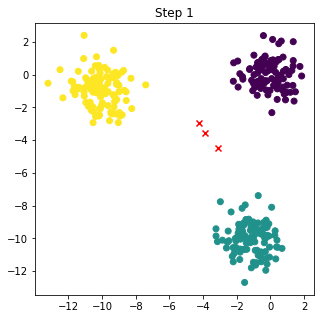

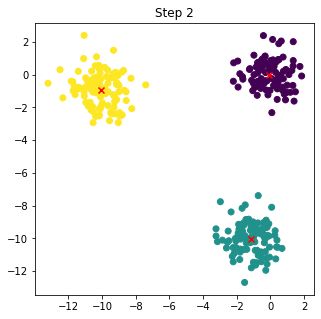

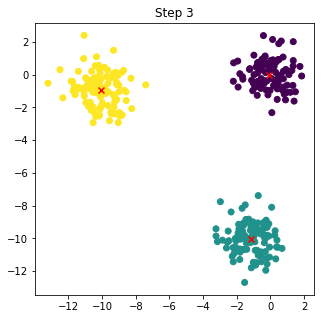

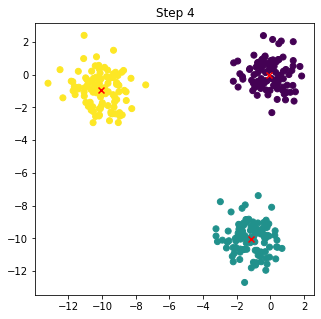

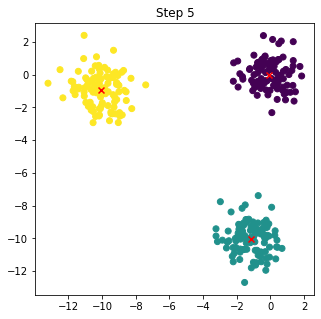

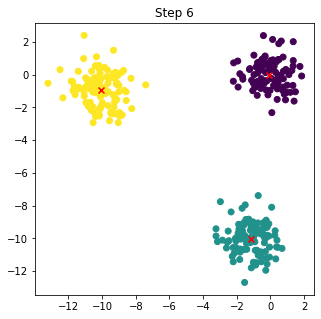

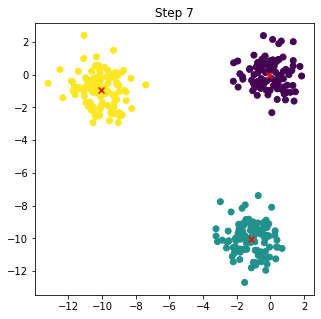

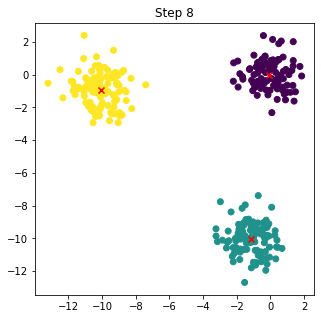

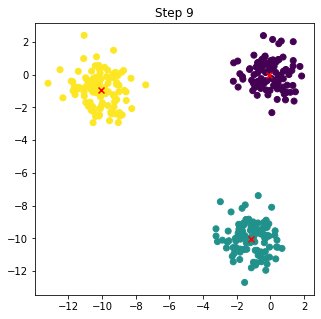

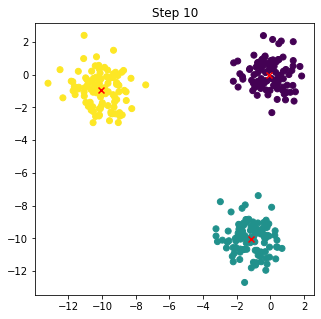

In [ ]:
km = KMeans(3)
km.fit(X, visualize=True)
y = km.transform(X)

Итоговая кластеризация:

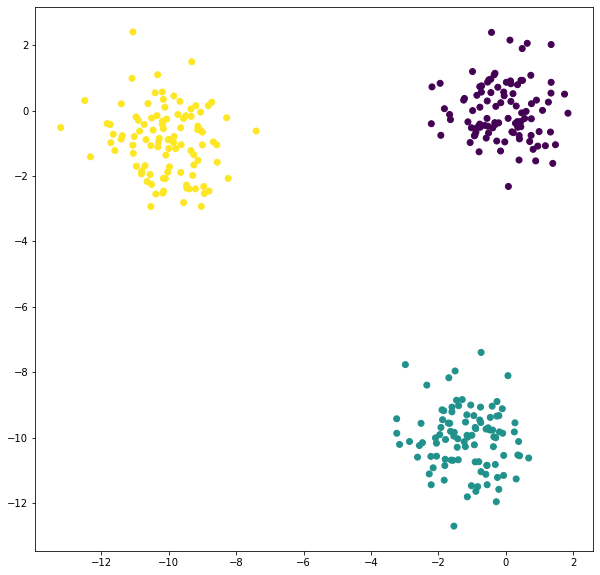

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Часть 2. Кластеризация цифр (4 балла)

В этом задании вам нужно будет кластеризовать изображения цифр. В данном случае одна картинка - это один объект (признаков столько, сколько на картинке пикселей).

In [1]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

In [2]:
digits = load_digits()
#digits

In [7]:
labels = digits["target"]
data = digits["data"]
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Число объектов и признаков:

In [8]:
data.shape

(1797, 64)

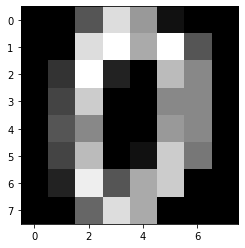

In [9]:
# Каждый объект - изображение цифры размеров 8 x 8
plt.imshow(data[0].reshape(8, 8), cmap="gray")
plt.show()

**PS:** [Визуализация картинок](https://pyprog.pro/mpl/mpl_imshow.html)

In [10]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

## Задание 1 (2 балла)

Кластеризуйте цифры методами кластеризации k-means ([`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)) и DBSCAN ([`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)). Измерьте качество кластеризации с помощью метрики Silhouette Coefficient ([`sklearn.metrics.silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)).

### K-means

In [21]:
# your code here
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=10, random_state=0) 
y_kmeans = kmeans.fit_predict(data)
y_centers = kmeans.cluster_centers_
#y_kmeans

### DBSCAN

Просмотрев тут лекции и [интернеты](https://medium.com/@alexowendavies/understanding-dimensionality-reduction-b319a6e60c80), заметил, что у нас dim = 64, что ну очень затрудняет интерпретацию и визуализацию данных (особенно, если связь между ними не линейная). В таких ситуациях полезно уменьшать размерность пространства - выделить наиболее информативные переменные, исключить мультиколлинеарность, сделать данные визуализируемыми и/или разделимыми. На примере 3D-Toy из ссылки можно увидеть, как данные разделяются на плоскости, используя разные методы.  
Линейные методы не подойдут, т.к в наших данных есть наложения окружностей (не разделимы при повороте базиса, aka изменении угла "взгляда"). Воспользуемся `t-SNE`, чтобы учесть наличие связи в данных. 

In [12]:
from sklearn.manifold import TSNE

TSNE_model = TSNE(verbose = 0)
embedding  = TSNE_model.fit_transform(data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [13]:
DB = DBSCAN(eps=5, min_samples=8)
y_dbscan = DB.fit_predict(embedding)
y_labels = DB.labels_
np.unique(y_labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

Метрика [`Silhouette`](https://en.wikipedia.org/wiki/Silhouette_(clustering)) сравнивает среднее расстояние внутри заданного кластера со средним расстоянием до точек ближайшего кластера.  
$$\dfrac{b(i)-a(i)}{max\{a(i), b(i)\}},$$
где $a(i)$ - среднее внутрикластеровое расстояние, а $b(i)$ - среднее межкластеровое расстояние (до ближайшего кластера).

In [22]:
from sklearn.metrics import silhouette_score
score_k = silhouette_score(data, y_kmeans)
score_db = silhouette_score(data, y_dbscan)
print("For K-means n_clusters = {}, silhouette score is {})".format(10, round(score_k, 4)))
print("For DBSCAN eps = {}, min_samples = {}, silhouette score is {})".format(0.1, 3, round(score_db, 4)))

For K-means n_clusters = 10, silhouette score is 0.1825)
For DBSCAN eps = 0.1, min_samples = 3, silhouette score is 0.1599)


## Задание 2 (1 балл)

Для кластеризации методом k-means визуализируйте картинки - центры кластеров (метод `.cluster_centers_` у KMeans).

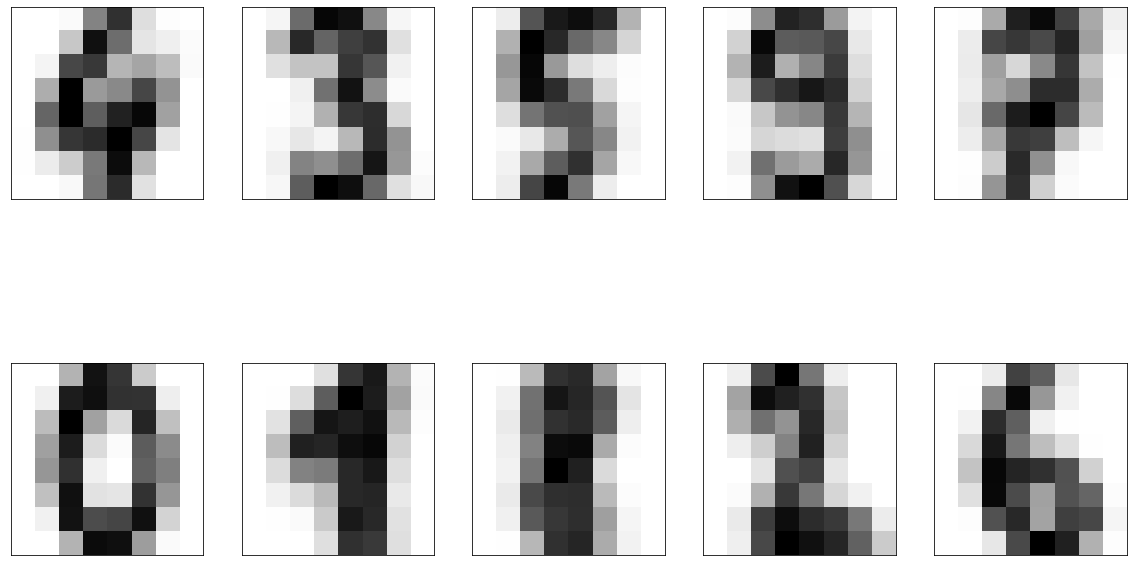

In [23]:
fig, ax = plt.subplots(2, 5, figsize=(20, 12))
centers = y_centers.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

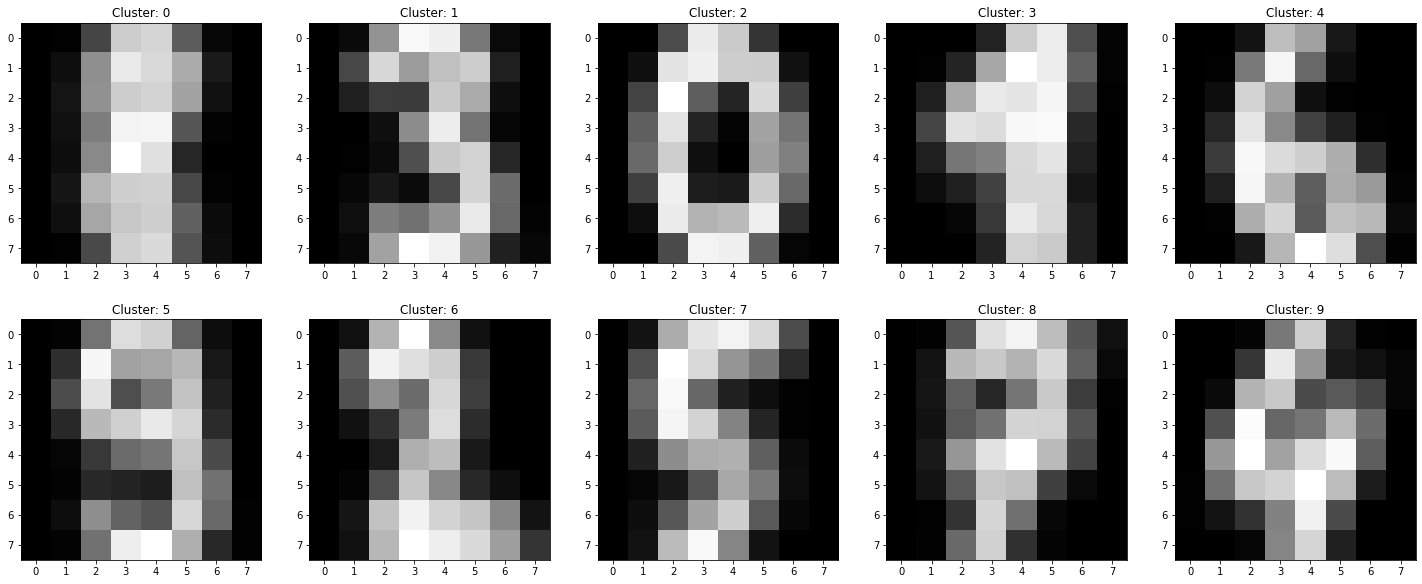

In [ ]:
# your code here

## Задание 3 (1 балл)

Для кластеризации методом DBSCAN выведите три случайно выбранные картинки из каждого кластера.

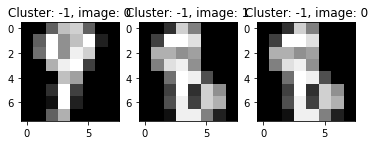

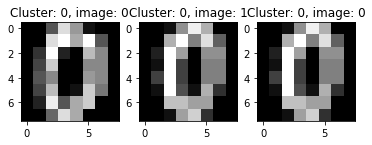

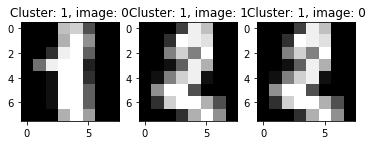

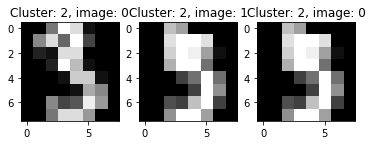

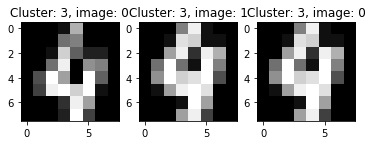

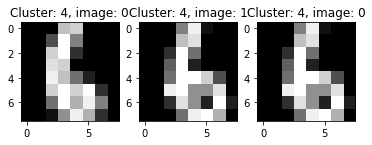

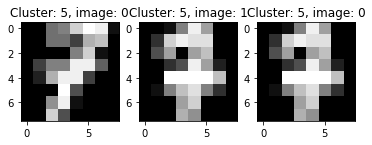

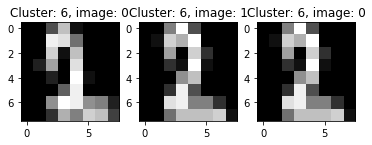

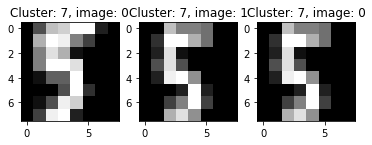

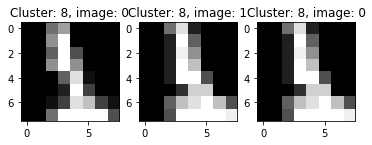

In [24]:
for label in np.unique(y_labels):
  #data[y_labels == label][:3]
  fig, axes = plt.subplots(1, 3)
  axes[0].imshow(data[y_labels == label][0].reshape(8, 8), cmap="gray")
  axes[0].set_title('Cluster: {}, image: {}'.format(label, 0))
  
  axes[1].imshow(data[y_labels == label][1].reshape(8, 8), cmap="gray")
  axes[1].set_title('Cluster: {}, image: {}'.format(label, 1))

  axes[2].imshow(data[y_labels == label][1].reshape(8, 8), cmap="gray")
  axes[2].set_title('Cluster: {}, image: {}'.format(label, 0))
  
  plt.show()

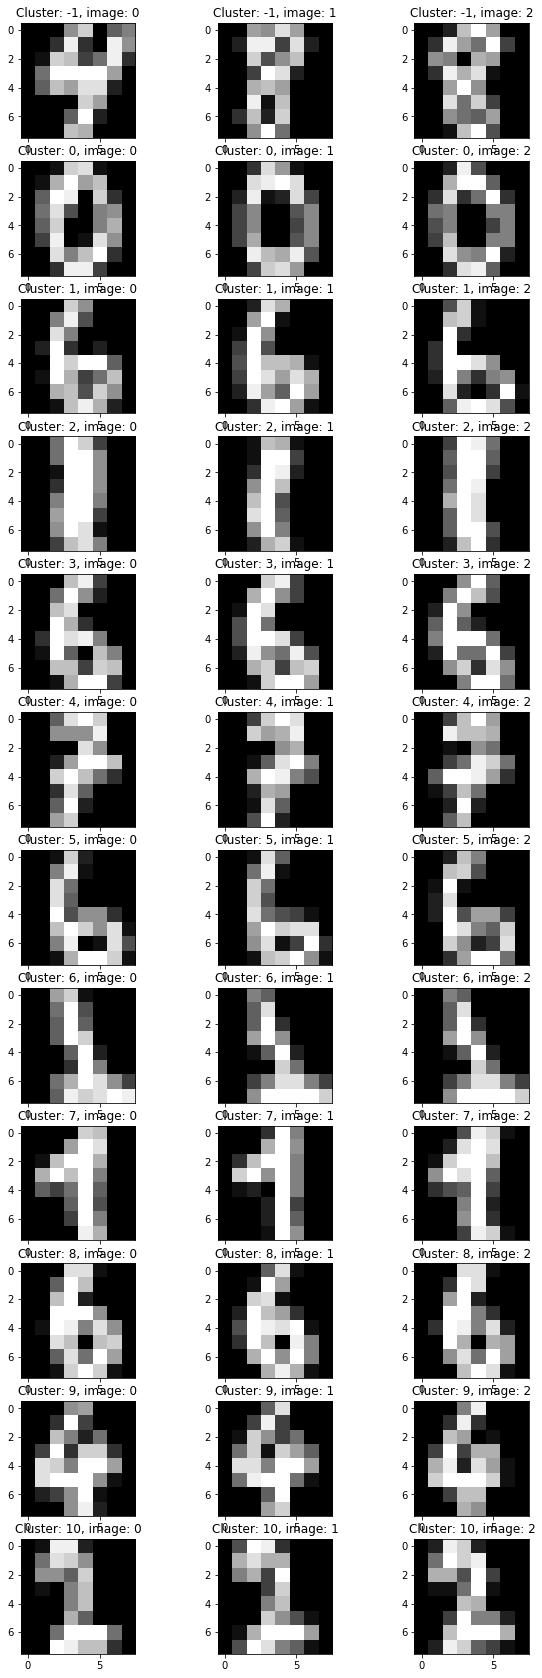

In [ ]:
# your code here